In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go # para hacer graficos interactivos
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración inicial
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
# Cargar Datos
def load_data(file_path):
    '''Carga y limpieza de bankloan'''
    df = pd.read_csv(file_path, sep=';', encoding='utf-8-sig')
    
    # Limpieza de de datos
    # convertir columnas a numéricas. manejando errores
    numeric_cols=['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'default']
    # recorriendo numeric_cols y convirtiendo a numérico
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
    # manejar valores missing
    df.fillna(df.median(numeric_only=True), inplace=True)
    
    # Eliminar duplicados
    df.drop_duplicates(inplace=True)
    
    # Crear Variable categórica para default
    df['default_status'] = df['default'].map({0: 'Aprobado', 1: 'No Aprobado'})
    
    # Crear ratio de endeudamiento
    df['ratio_debtinc'] = df['debtinc'] / df['income'].replace(0,1)
    
    print(f'Dataset cargado: {df.shape[0]} filas y {df.shape[1]} columnas')
    
    return df   

df = load_data('Bankloan.csv')    


Dataset cargado: 700 filas y 11 columnas


============ Anánlisis Univariante ============

ANÁLISIS UNIVARIANTE
              age          ed      employ     address        income  \
count  700.000000  700.000000  700.000000  700.000000  7.000000e+02   
mean    34.874286    1.697143    8.388571    8.268571  4.512286e+07   
std      8.741801    0.920125    6.658039    6.821609  3.653143e+07   
min     20.000000    1.000000    0.000000    0.000000  1.400000e+07   
25%     29.000000    1.000000    3.000000    3.000000  2.400000e+07   
50%     34.000000    1.000000    7.000000    7.000000  3.400000e+07   
75%     40.000000    2.000000   12.000000   12.000000  5.225000e+07   
max    136.000000    5.000000   31.000000   34.000000  4.460000e+08   

            debtinc      creddebt       othdebt  
count  7.000000e+02  7.000000e+02  7.000000e+02  
mean   1.026057e+07  1.553553e+06  3.058209e+06  
std    6.827234e+06  2.117197e+06  3.287555e+06  
min    4.000000e+05  1.169600e+04  4.558400e+04  
25%    5.000000e+06  3.690592e+05  1.044178e+06  
50%    8.600000e+06  8.548695e+05  1.98

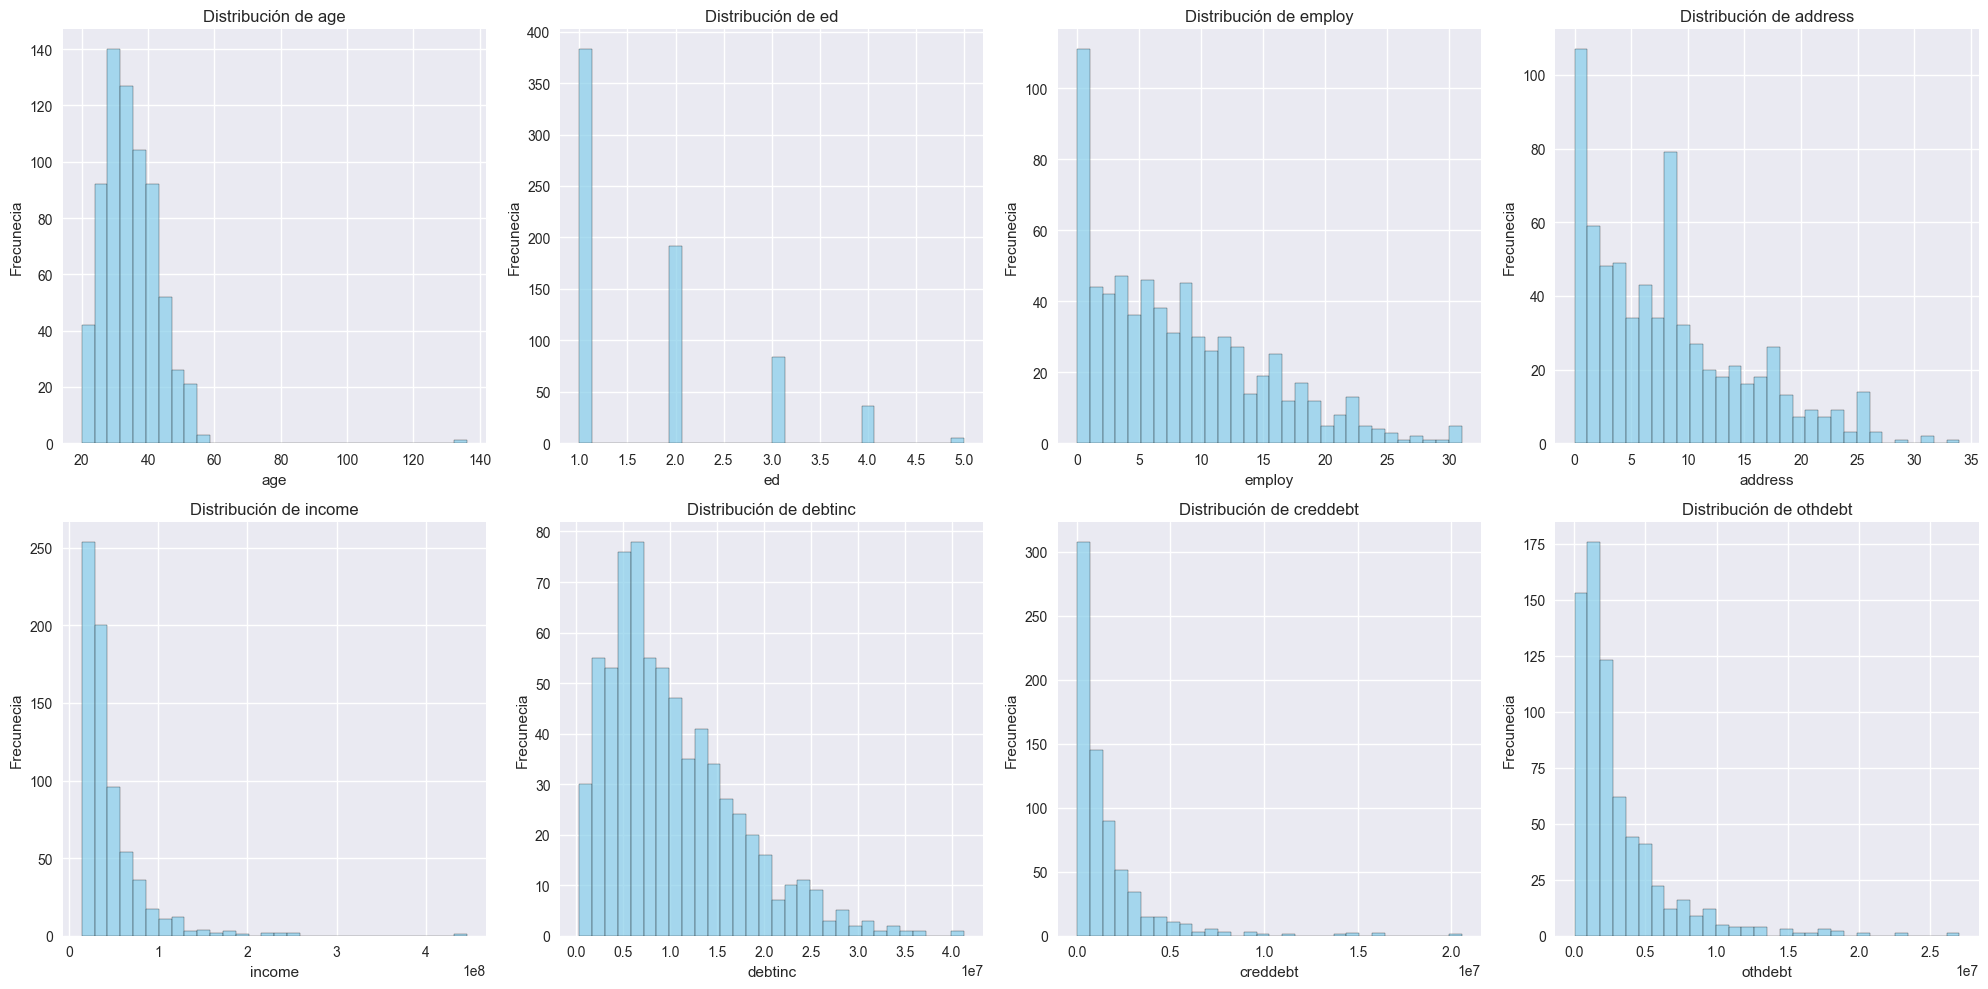

In [3]:
def univariate_analisys(df):
    '''Análisis univariante de variables numéricas'''
    #numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns  
    numeric_cols = ['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']
    print('=' * 50)
    print('ANÁLISIS UNIVARIANTE')
    print('=' * 50)
    
    #estadísticas descriptivas
    print(df[numeric_cols].describe())
    
    # Histogramas
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()
    
    for i, col in enumerate(numeric_cols):
        if i < len(axes):
            axes[i].hist(df[col].dropna(), bins=30, alpha=.7, color='skyblue', edgecolor='black')
            axes[i].set_title(f'Distribución de {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frecunecia')

    plt.tight_layout()
    plt.show()
     
univariate_analisys(df)


============= ANÁLISIS BIVARIANTE =============

ANÁLISIS BIVARIANTE
               age        ed    employ   address    income   debtinc  \
age       1.000000  0.023361  0.500815  0.514487  0.420044 -0.006807   
ed        0.023361  1.000000 -0.129984  0.055827  0.250727  0.029638   
employ    0.500815 -0.129984  1.000000  0.321031  0.601258 -0.031182   
address   0.514487  0.055827  0.321031  1.000000  0.312113  0.012352   
income    0.420044  0.250727  0.601258  0.312113  1.000000 -0.043790   
debtinc  -0.006807  0.029638 -0.031182  0.012352 -0.043790  1.000000   
creddebt  0.264211  0.102465  0.403694  0.209019  0.557379  0.501767   
othdebt   0.292005  0.184285  0.406091  0.227020  0.577432  0.584870   
default  -0.133234  0.128785 -0.282978 -0.163657 -0.077434  0.389575   

          creddebt   othdebt   default  
age       0.264211  0.292005 -0.133234  
ed        0.102465  0.184285  0.128785  
employ    0.403694  0.406091 -0.282978  
address   0.209019  0.227020 -0.163657  
income    0.557379  0.577432 -0.077434  
debtinc   0.5

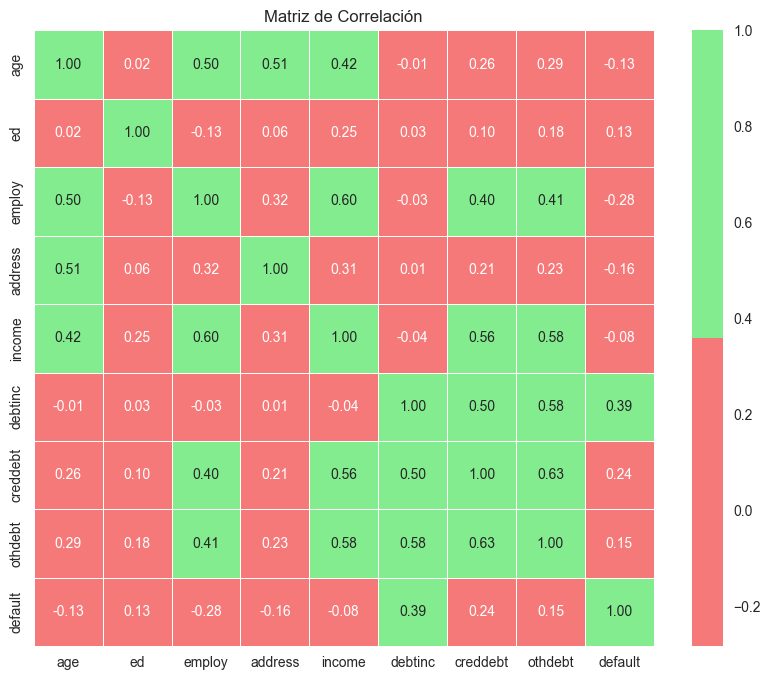

<Figure size 1200x1000 with 0 Axes>

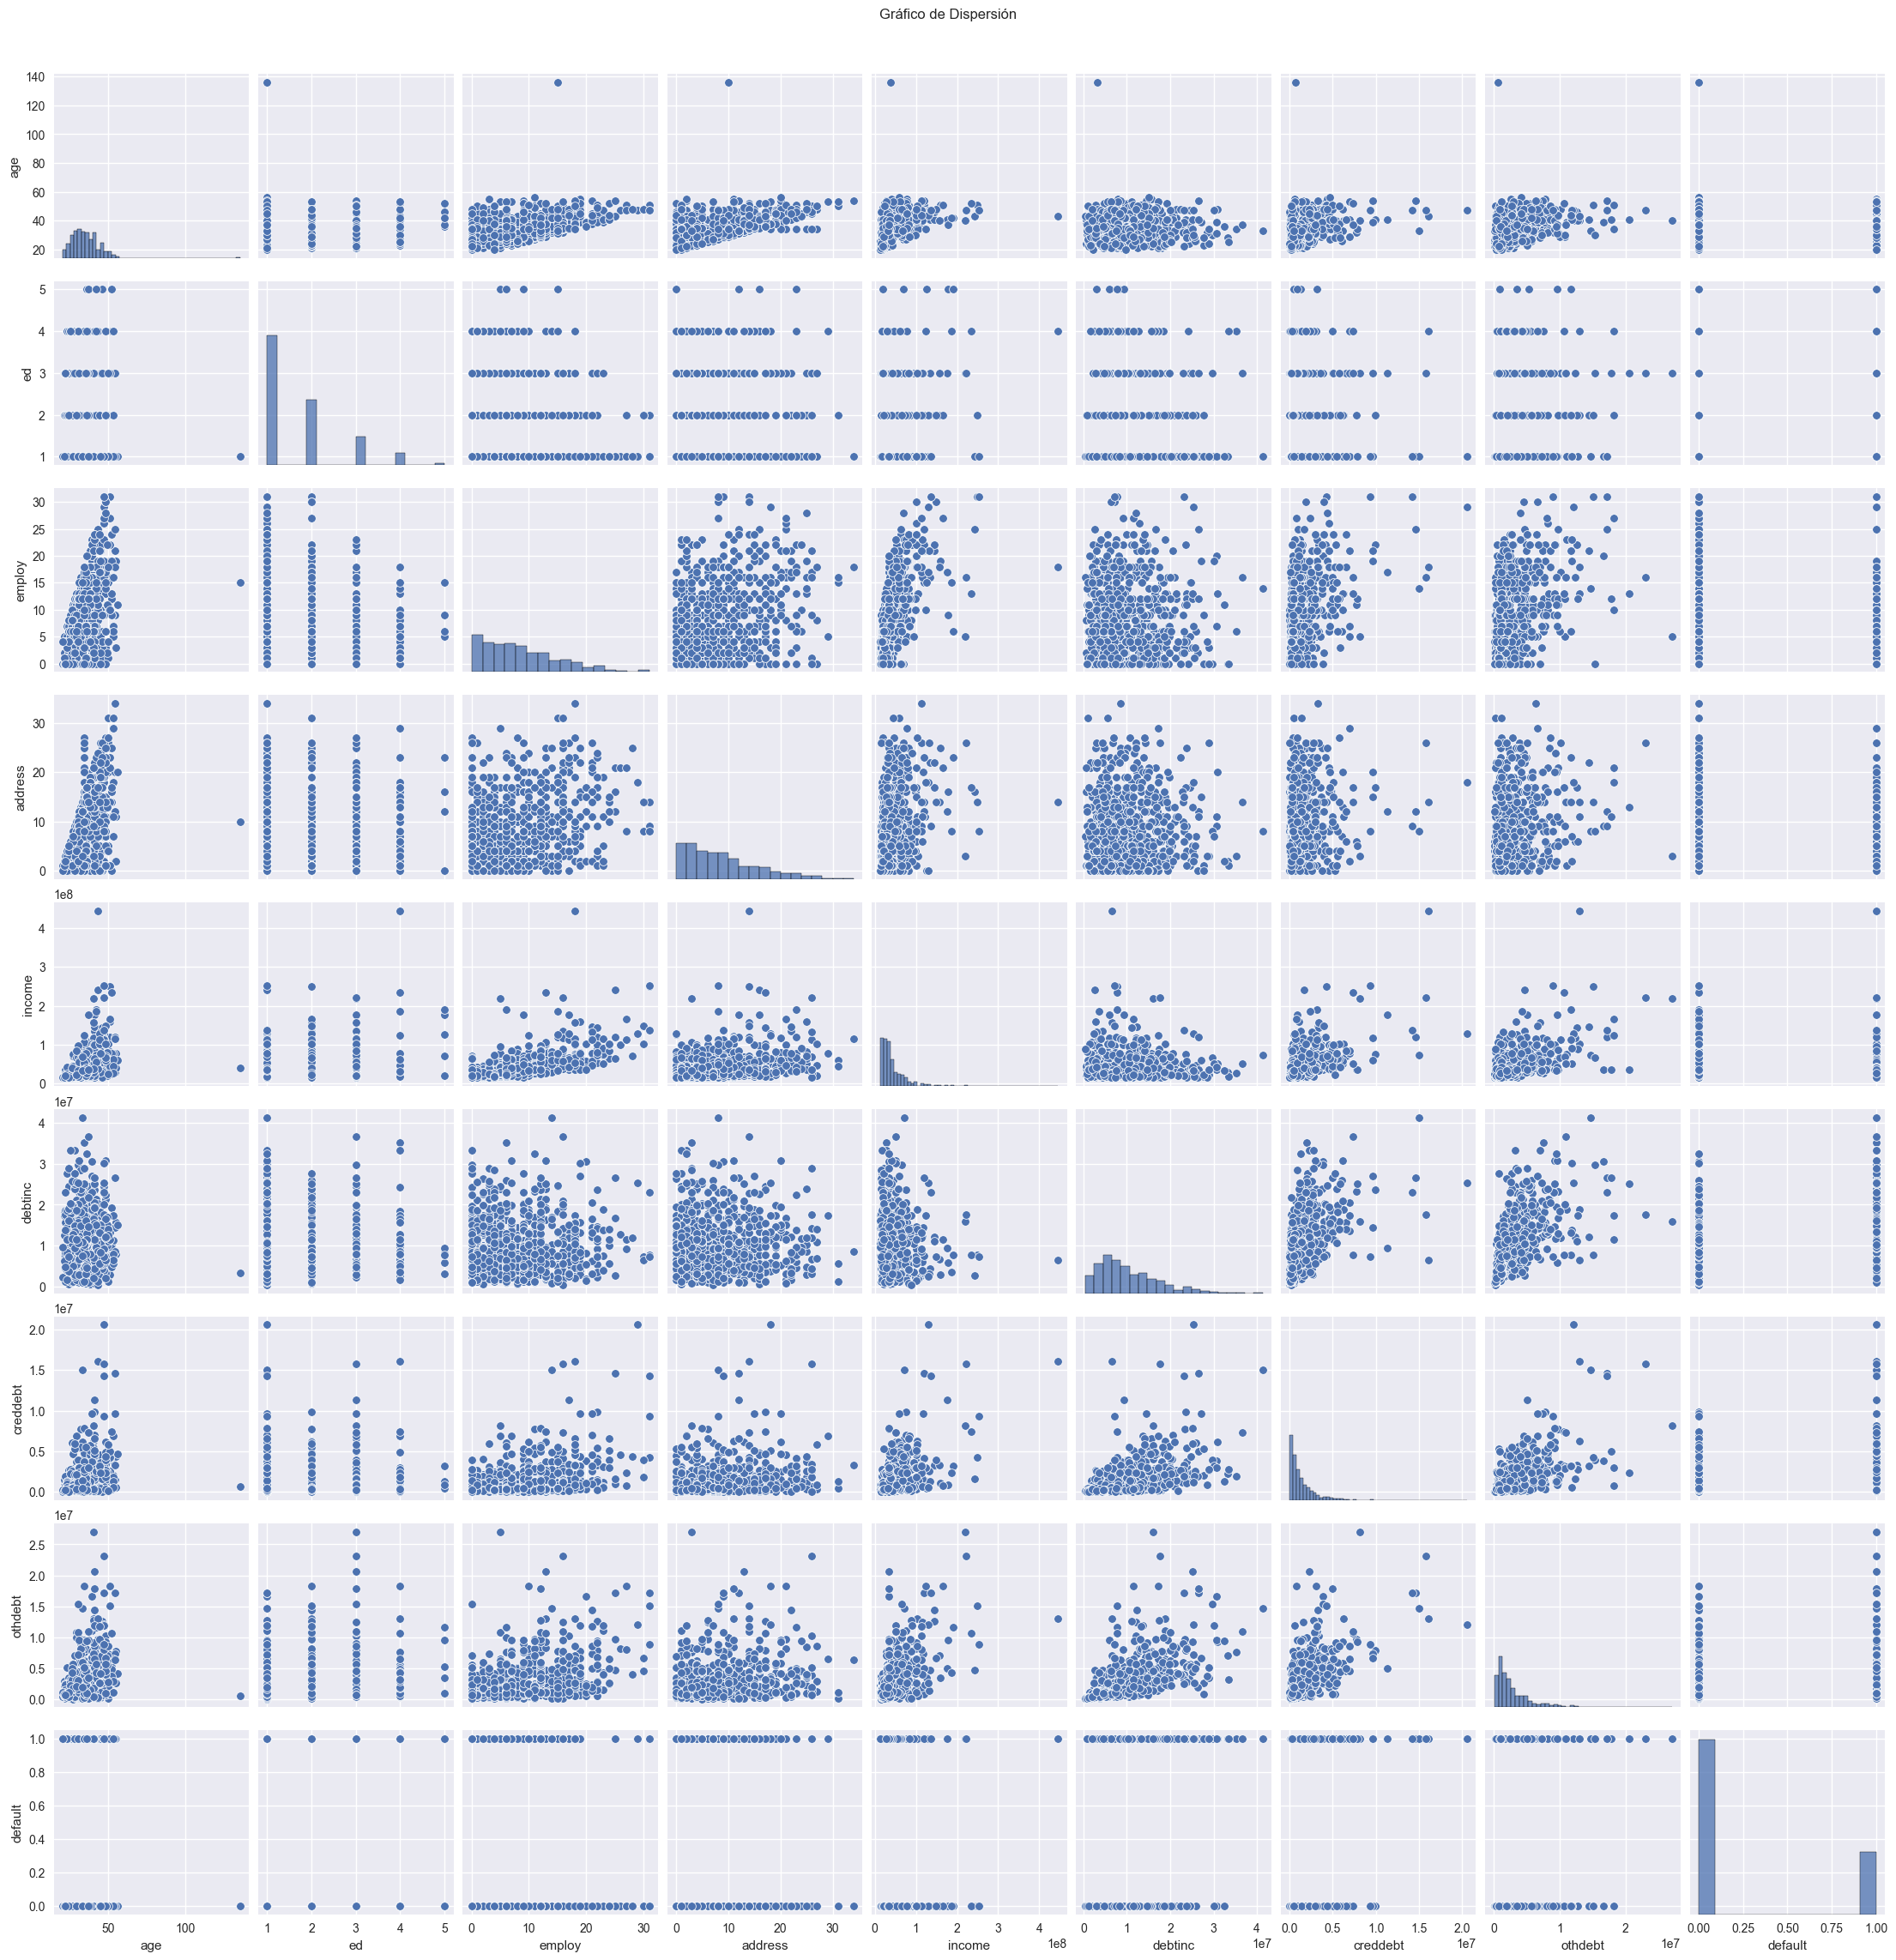

In [4]:
def bivariat_analysis(df):
    '''Análisis bivariante de variables numéricas'''
    print('=' * 50)
    print('ANÁLISIS BIVARIANTE')
    print('=' * 50)

    # Matriz de correlación
    numeric_cols = ['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt','default']
    
    # Matriz de correlación
    corr_matrix = df[numeric_cols].corr()
    
    print(corr_matrix)

    # Mapa de calor
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap=["#F67979","#82ec8e"], fmt='.2f', linewidths=.5)
    plt.title('Matriz de Correlación')
    plt.show()

    # Gráfico de dispersión
    plt.figure(figsize=(12, 10))
    sns.pairplot(df[numeric_cols], height=2.5)
    plt.suptitle('Gráfico de Dispersión', y=1.02)
    plt.show()
    
bivariat_analysis(df)

In [26]:
# Análisis Bivariante

def bivariat_analysis_(df):
    """Análisis bivariante y correlaciones"""
    print("=" * 50)
    print("ANÁLISIS BIVARIANTE")
    print("=" * 50)
    
    # Matriz de correlación
    numeric_cols = ['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'default']    
    
    corr_matrix = df[numeric_cols].corr()
    
    fig = px.imshow(
        corr_matrix, text_auto='.2f', 
        aspect="auto", 
        color_continuous_scale=["red",'white','green'],
        zmin=-1, zmax=1
    )
    fig.update_layout(
        title="Matriz de Correlación",
        width=800, height=600,     
    )
    fig.show()
    
    # Relación entre edad e igresos por estado de préstamo
    fig = px.scatter(
        df, x='age', y='income',
        color='default_status',
        title='Edad VS Ingresos por Estado de Préstamo',
        labels={'age': 'Edad', 'income': 'Ingresos', 'default_status': 'Estado de Préstamo'},
        color_discrete_map={'Aprobado': 'green', 'No Aprobado': 'red'}
    )
    fig.show()
    
    # Boxplot de ingresos por estado de préstamo
    fig = px.box(
        df, x='default_status', y='income',
        title='Ingresos por Estado de Préstamo',
        labels={'default_status': 'Estado de Préstamo', 'income': 'Ingresos'},
        color='default_status',
        color_discrete_map={'Aprobado': 'green', 'No Aprobado': 'red'}
    )
    fig.show()
    
    # Relación entre deuda e igresos por estado de préstamo
    fig = px.scatter(
        df, x='income', y='debtinc',
        color='default_status',
        title='Deuda VS Ingresos por Estado de Préstamo',
        labels={'debtinc': 'Deuda', 'income': 'Ingresos', 'default_status': 'Estado de Préstamo'},
        color_discrete_map={'Aprobado': 'green', 'No Aprobado': 'red'}
    )
    fig.show()
    
bivariat_analysis_(df)  

ANÁLISIS BIVARIANTE


========= ANÁLISIS DE SEGMENTACIÓN ========= 

In [30]:
def segmentation_analysis(df):
    """Análisis de segmentos por edad y educación"""
    print("=" * 50)
    print("ANÁLISIS DE SEGMENTACIÓN")
    print("=" * 50)
    
    # creación de segmentos por edad y educación
    df['age_group'] = pd.cut(df['age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '>60'])

    # tasa de defaulr por prupo de edad
    default_by_age = df.groupby('age_group')['default'].mean().reset_index()
    fig=px.bar(
        default_by_age, x='age_group', y='default',
        title='Tasa de Default por Grupo de Edad',
        labels={'age_group': 'Grupo de Edad', 'default': 'Tasa de Default'},
        color='default',
        color_continuous_scale=['red','green']
    )
    fig.show()
    
segmentation_analysis(df)

# Exportar para power bin
df.to_csv('bankloan_processed.csv', index=False)
print('✅ Archivo exportado con éxito')

ANÁLISIS DE SEGMENTACIÓN


✅ Archivo exportado con éxito


======== DASBOARD EN POWER BI ========